Going to merge the directory, staff, finance, AP scores, for all years and just their totals 

In [59]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [60]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import missingno as msno
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [61]:
ap_direct = pd.read_csv('ap_dir_tottot.csv')
staff = pd.read_csv('staff_all.csv')
finance = pd.read_csv('finance_all.csv')

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3369: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [62]:
print(staff.dtypes)
#print(ap_direct.dtypes)
#print(finance.dtypes)

Unnamed: 0                    int64
crdc_id                      object
year                          int64
ncessch                      object
leaid                        object
teachers_fte_crdc           float64
teachers_certified_fte      float64
teachers_uncertified_fte    float64
teachers_first_year_fte     float64
teachers_second_year_fte    float64
teachers_current_sy         float64
teachers_previous_sy        float64
teachers_absent_fte         float64
counselors_fte              float64
psychologists_fte           float64
social_workers_fte          float64
nurses_fte                  float64
security_guard_fte          float64
law_enforcement_fte         float64
law_enforcement_ind         float64
dtype: object


### This is just the staff column 

In [63]:
#making the staff and finance ncessch a floatie boy 
staff = staff[staff['ncessch'] != "06CC14100001"] 
staff = staff.iloc[:,1:]
cols = ['ncessch']
staff[cols] = staff[cols].apply(pd.to_numeric, axis=1)

#drop certain columns also 
staff = staff.drop(['leaid', 'teachers_certified_fte',
                   'teachers_uncertified_fte',
                   'teachers_first_year_fte', 'teachers_second_year_fte'], axis =1)

In [64]:
staff.dtypes
#ap_dir_tottot is the one with all years but total race and sex columns 
#staff = staff.dropna(axis = 0, subset=('ncessch',))

#staff.isnull().sum()
#staff

crdc_id                  object
year                      int64
ncessch                 float64
teachers_fte_crdc       float64
teachers_current_sy     float64
teachers_previous_sy    float64
teachers_absent_fte     float64
counselors_fte          float64
psychologists_fte       float64
social_workers_fte      float64
nurses_fte              float64
security_guard_fte      float64
law_enforcement_fte     float64
law_enforcement_ind     float64
dtype: object

<AxesSubplot:>

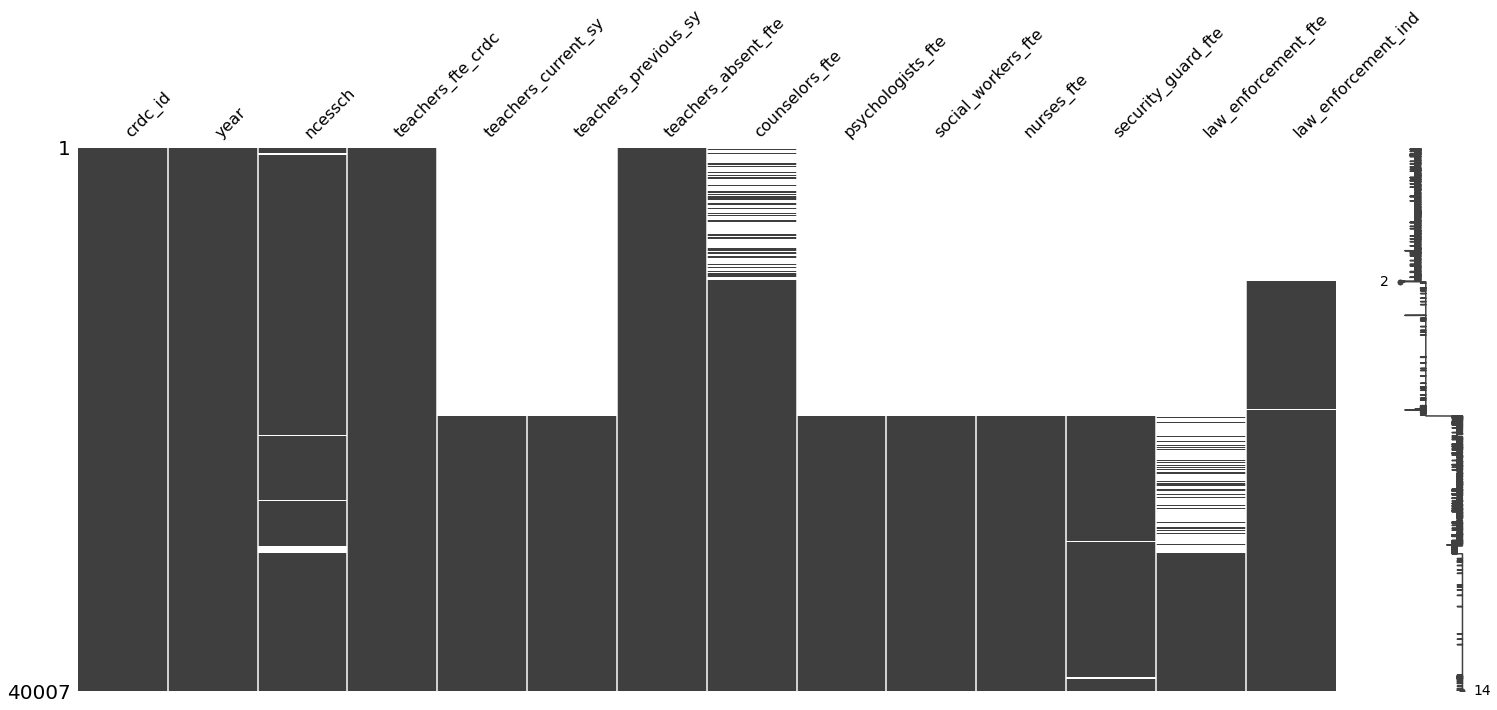

In [65]:
msno.matrix(staff)

In [66]:
#pull for 2015 then make correlation matrix to see if we should impute 
#msno.matrix(ap_direct)
#ap_direct

In [67]:
ap_direct = ap_direct.dropna(axis = 0, subset=('ncessch',))

In [68]:

#msno.matrix(ap_direct)

In [69]:
#divide everythign by enrollment numbers !!!!!!!!! Ap_scores and staff stuff 
#this many teachers per this many students 
ap_direct = ap_direct[ap_direct.enrollment > 0]

ap_direct['AP_oneormore_relative']= (ap_direct['students_AP_exam_oneormore'] / ap_direct['enrollment']) * 100

ap_direct

,ncessch,year,leaid,race,sex,students_AP_exam_none,students_AP_exam_oneormore,latitude,longitude,enrollment,school_name,AP_oneormore_relative
0,60000103278.00000,2011,600001.00000,99,99,89.00000,42.00000,34.49362,-118.21611,513.00000,VASQUEZ HIGH,8.18713
1,60000310347.00000,2011,600003.00000,99,99,13.00000,2.00000,37.55963,-121.96304,420.00000,CALIFORNIA SCHOOL FOR THE DEAF-FREMONT,0.47619
2,60001109065.00000,2011,600011.00000,99,99,2.00000,4.00000,40.13874,-120.14397,78.00000,HERLONG HIGH,5.12821
3,60001302405.00000,2011,600013.00000,99,99,11.00000,483.00000,38.81363,-121.25347,1843.00000,ROCKLIN HIGH,26.20727
4,60001311010.00000,2011,600013.00000,99,99,0.00000,424.00000,38.83641,-121.28939,1777.00000,WHITNEY HIGH,23.86044
...,...,...,...,...,...,...,...,...,...,...,...,...
4937,69100503940.00000,2017,691005.00000,99,99,1.00000,556.00000,37.94970,-121.96905,2187.00000,Clayton Valley Charter High,25.42295
4938,69100512043.00000,2017,691005.00000,99,99,1.00000,102.00000,37.98871,-122.33271,795.00000,Making Waves Academy,12.83019
4939,69102413076.00000,2017,691024.00000,99,99,35.00000,130.00000,33.76230,-117.90235,527.00000,Samueli Academy,24.66793
4943,69103512016.00000,2017,691035.00000,99,99,29.00000,227.00000,37.29104,-121.87394,656.00000,University Preparatory Academy Charter,34.60366


In [70]:
#now we must merge this ap_direct data with the staff data 
ap_dir_staff = pd.merge(ap_direct, staff, how = "left", on=["ncessch", "year"])
ap_dir_staff

,ncessch,year,leaid,race,sex,students_AP_exam_none,students_AP_exam_oneormore,latitude,longitude,enrollment,...,teachers_current_sy,teachers_previous_sy,teachers_absent_fte,counselors_fte,psychologists_fte,social_workers_fte,nurses_fte,security_guard_fte,law_enforcement_fte,law_enforcement_ind
0,60000103278.00000,2011,600001.00000,99,99,89.00000,42.00000,34.49362,-118.21611,513.00000,...,NaN,NaN,0.00000,1.00000,NaN,NaN,NaN,NaN,NaN,NaN
1,60000310347.00000,2011,600003.00000,99,99,13.00000,2.00000,37.55963,-121.96304,420.00000,...,NaN,NaN,54.00000,4.00000,NaN,NaN,NaN,NaN,NaN,NaN
2,60001109065.00000,2011,600011.00000,99,99,2.00000,4.00000,40.13874,-120.14397,78.00000,...,NaN,NaN,1.00000,0.17000,NaN,NaN,NaN,NaN,NaN,NaN
3,60001302405.00000,2011,600013.00000,99,99,11.00000,483.00000,38.81363,-121.25347,1843.00000,...,NaN,NaN,14.00000,3.00000,NaN,NaN,NaN,NaN,NaN,NaN
4,60001311010.00000,2011,600013.00000,99,99,0.00000,424.00000,38.83641,-121.28939,1777.00000,...,NaN,NaN,19.00000,3.00000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4763,69100512043.00000,2017,691005.00000,99,99,1.00000,102.00000,37.98871,-122.33271,795.00000,...,47.00000,43.00000,5.00000,10.00000,0.00000,1.00000,0.00000,3.00000,0.00000,0.00000
4764,69102413076.00000,2017,691024.00000,99,99,35.00000,130.00000,33.76230,-117.90235,527.00000,...,22.00000,20.00000,6.00000,2.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
4765,69103512016.00000,2017,691035.00000,99,99,29.00000,227.00000,37.29104,-121.87394,656.00000,...,42.00000,40.00000,5.00000,3.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4766,69103512016.00000,2017,691035.00000,99,99,29.00000,227.00000,37.29104,-121.87394,656.00000,...,34.00000,33.00000,0.00000,1.80000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [71]:
#now going to divide the stafff columns by the enrollment to get the rates 
#here we see for some reason there are double values for the same school / year combo 
thing = ap_direct.groupby(['ncessch', 'year', 'latitude', 'longitude']).size().reset_index()
thing
thing[thing[0] > 1]

#ap_direct[ap_direct['ncessch'] == 62958013029]

,ncessch,year,latitude,longitude,0
1287,61291011756.00000,2013,33.12540,-117.08370,2
1662,61674011849.00000,2013,37.63120,-122.10240,2
3234,62958013029.00000,2017,34.57958,-118.06934,2
4702,69103512016.00000,2017,37.29104,-121.87394,2


In [72]:
ap_dir_staff.columns

Index(['ncessch', 'year', 'leaid', 'race', 'sex', 'students_AP_exam_none',
       'students_AP_exam_oneormore', 'latitude', 'longitude', 'enrollment',
       'school_name', 'AP_oneormore_relative', 'crdc_id', 'teachers_fte_crdc',
       'teachers_current_sy', 'teachers_previous_sy', 'teachers_absent_fte',
       'counselors_fte', 'psychologists_fte', 'social_workers_fte',
       'nurses_fte', 'security_guard_fte', 'law_enforcement_fte',
       'law_enforcement_ind'],
      dtype='object')

In [73]:
ap_dir_staff.describe()

,ncessch,year,leaid,race,sex,students_AP_exam_none,students_AP_exam_oneormore,latitude,longitude,enrollment,...,teachers_current_sy,teachers_previous_sy,teachers_absent_fte,counselors_fte,psychologists_fte,social_workers_fte,nurses_fte,security_guard_fte,law_enforcement_fte,law_enforcement_ind
count,4768.00000,4768.00000,4768.00000,4768.00000,4768.00000,4768.00000,4768.00000,4768.00000,4768.00000,4768.00000,...,2386.00000,2386.00000,4758.00000,4759.00000,2386.00000,2386.00000,2386.00000,2386.00000,1761.00000,3608.00000
mean,62301092869.84543,2014.04488,623010.86430,99.00000,99.00000,80.97462,248.32844,35.72189,-119.52931,1469.09920,...,66.44258,61.30889,15.83381,3.72514,1.01265,0.20326,0.60796,2.03035,0.59469,0.45399
std,1571871516.07991,2.25119,15718.70448,0.00000,0.00000,105.76154,238.80135,2.19118,2.01057,906.76566,...,36.72487,39.68130,16.09460,5.03181,1.92778,0.55447,2.82972,2.67438,2.11001,0.49795
min,60000103278.00000,2011.00000,600001.00000,99.00000,99.00000,0.00000,0.00000,32.56566,-124.28555,6.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,61207007279.00000,2013.00000,612070.00000,99.00000,99.00000,11.00000,58.00000,33.95857,-121.54285,620.50000,...,33.00000,27.00000,3.00000,2.00000,0.14000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,62271011495.50000,2015.00000,622710.00000,99.00000,99.00000,49.00000,181.00000,34.43009,-118.74935,1492.50000,...,68.50000,61.00000,12.00000,3.50000,1.00000,0.00000,0.25000,0.94000,0.50000,0.00000
75%,63375005204.00000,2017.00000,633750.00000,99.00000,99.00000,111.00000,373.00000,37.73247,-117.94879,2139.00000,...,93.00000,85.00000,24.00000,5.00000,1.00000,0.00000,1.00000,3.85000,1.00000,1.00000
max,69113710339.00000,2017.00000,691137.00000,99.00000,99.00000,1381.00000,1565.00000,41.76987,-114.60660,5423.00000,...,218.00000,284.00000,118.52000,200.00000,60.00000,6.55000,85.00000,18.50000,85.74000,1.00000


In [74]:
print(ap_dir_staff[divide].shape)
ap_dir_staff['enrollment'].shape
ap_dir_staff['enrollment']

KeyError: "None of [Index(['salaries_teachers'], dtype='object')] are in the [columns]"

In [75]:
#making things ratios here ... 
#msno.matrix(ap_dir_staff

divide = ['teachers_current_sy', 'teachers_previous_sy', 'teachers_absent_fte',
       'counselors_fte', 'psychologists_fte', 'social_workers_fte',
       'nurses_fte', 'security_guard_fte', 'law_enforcement_fte',
       'law_enforcement_ind']

ap_dir_staff[divide] = ap_dir_staff[divide].div(ap_dir_staff['enrollment'].values, axis =0)

ap_dir_staff


,ncessch,year,leaid,race,sex,students_AP_exam_none,students_AP_exam_oneormore,latitude,longitude,enrollment,...,teachers_current_sy,teachers_previous_sy,teachers_absent_fte,counselors_fte,psychologists_fte,social_workers_fte,nurses_fte,security_guard_fte,law_enforcement_fte,law_enforcement_ind
0,60000103278.00000,2011,600001.00000,99,99,89.00000,42.00000,34.49362,-118.21611,513.00000,...,NaN,NaN,0.00000,0.00195,NaN,NaN,NaN,NaN,NaN,NaN
1,60000310347.00000,2011,600003.00000,99,99,13.00000,2.00000,37.55963,-121.96304,420.00000,...,NaN,NaN,0.12857,0.00952,NaN,NaN,NaN,NaN,NaN,NaN
2,60001109065.00000,2011,600011.00000,99,99,2.00000,4.00000,40.13874,-120.14397,78.00000,...,NaN,NaN,0.01282,0.00218,NaN,NaN,NaN,NaN,NaN,NaN
3,60001302405.00000,2011,600013.00000,99,99,11.00000,483.00000,38.81363,-121.25347,1843.00000,...,NaN,NaN,0.00760,0.00163,NaN,NaN,NaN,NaN,NaN,NaN
4,60001311010.00000,2011,600013.00000,99,99,0.00000,424.00000,38.83641,-121.28939,1777.00000,...,NaN,NaN,0.01069,0.00169,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4763,69100512043.00000,2017,691005.00000,99,99,1.00000,102.00000,37.98871,-122.33271,795.00000,...,0.05912,0.05409,0.00629,0.01258,0.00000,0.00126,0.00000,0.00377,0.00000,0.00000
4764,69102413076.00000,2017,691024.00000,99,99,35.00000,130.00000,33.76230,-117.90235,527.00000,...,0.04175,0.03795,0.01139,0.00380,0.00000,0.00000,0.00000,0.00190,0.00000,0.00000
4765,69103512016.00000,2017,691035.00000,99,99,29.00000,227.00000,37.29104,-121.87394,656.00000,...,0.06402,0.06098,0.00762,0.00457,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4766,69103512016.00000,2017,691035.00000,99,99,29.00000,227.00000,37.29104,-121.87394,656.00000,...,0.05183,0.05030,0.00000,0.00274,0.00152,0.00000,0.00000,0.00000,0.00000,0.00000


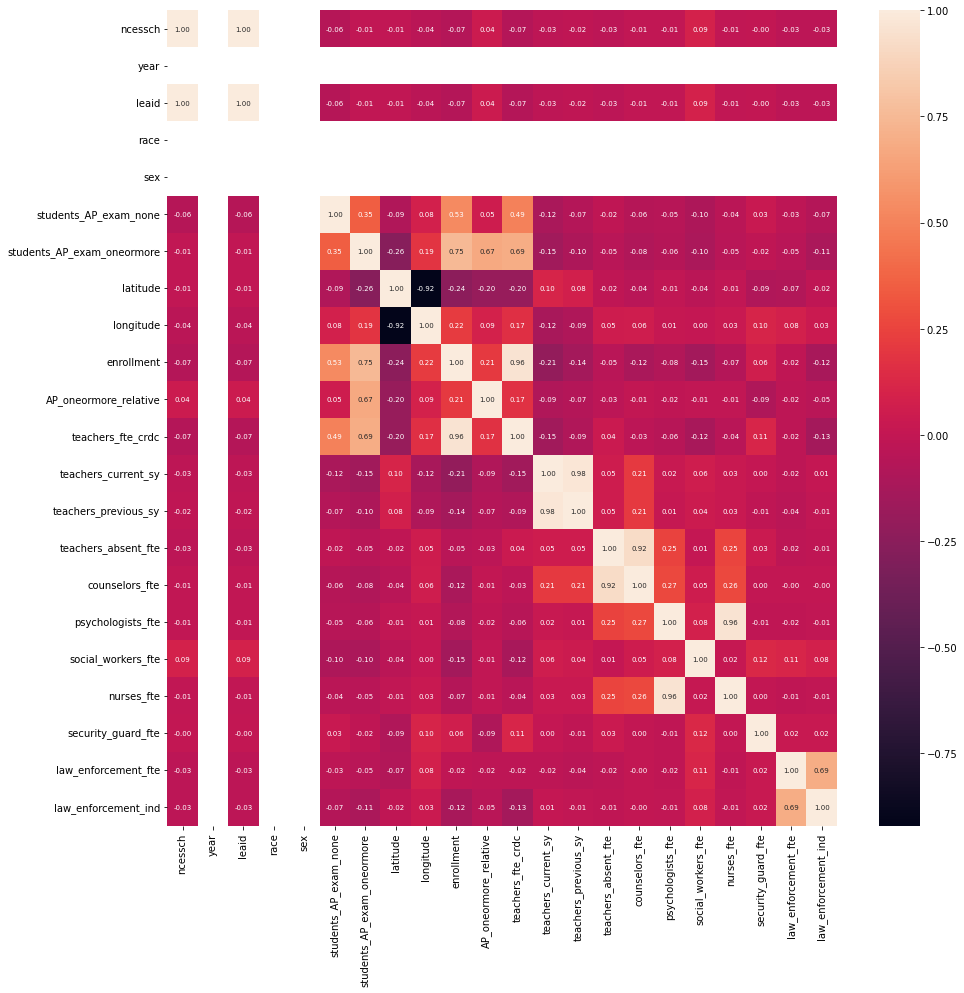

In [76]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,15))
correlation = ap_dir_staff[ap_dir_staff['year'] == 2017].corr()
sns.heatmap(correlation, annot = True, ax = ax,
           annot_kws={"fontsize":7}, fmt ='.2f')
plt.show()

In [77]:
#dropping all the irrelevant shit
ap_dir_staff = ap_dir_staff.drop(['teachers_previous_sy', 'teachers_absent_fte',
       'counselors_fte', 'psychologists_fte', 'social_workers_fte',
       'nurses_fte','law_enforcement_fte',
       'law_enforcement_ind'], axis =1)

In [78]:
#impute the values for the staff data 

test_2015 = ap_dir_staff[ap_dir_staff['year'] == 2015]
test_2013 = ap_dir_staff[ap_dir_staff['year'] == 2013]
test_2017 = ap_dir_staff[ap_dir_staff['year'] == 2017]
test_2011 = ap_dir_staff[ap_dir_staff['year'] == 2011]

#ap_dir_staff = pd.merge(ap_direct, staff, how = "left", on=["ncessch", "year"])

#teachers_current_sy and security guard fte ...... ??? I guess 

In [79]:
#dropping the values to chuck in the other ones 
test_2011 = test_2011.drop(['teachers_current_sy',
                           'security_guard_fte'], axis = 1)

test_2013 = test_2013.drop(['teachers_current_sy',
                           'security_guard_fte'], axis = 1)

In [80]:
test_2015

,ncessch,year,leaid,race,sex,students_AP_exam_none,students_AP_exam_oneormore,latitude,longitude,enrollment,school_name,AP_oneormore_relative,crdc_id,teachers_fte_crdc,teachers_current_sy,security_guard_fte
2382,60000103278.00000,2015,600001.00000,99,99,9.00000,32.00000,34.49292,-118.21895,399.00000,Vasquez High,8.02005,060000103278,19.00000,0.04762,0.00251
2383,60000310347.00000,2015,600003.00000,99,99,18.00000,6.00000,37.55963,-121.96304,392.00000,California School for the Deaf-Fremont,1.53061,060000310347,82.00000,0.32143,0.01020
2384,60000710348.00000,2015,600007.00000,99,99,8.00000,0.00000,33.94373,-117.37942,345.00000,California School for the Deaf-Riverside,0.00000,060000710348,72.00000,0.01739,0.01449
2385,60001302405.00000,2015,600013.00000,99,99,371.00000,184.00000,38.81363,-121.25347,1947.00000,Rocklin High,9.45044,060001302405,82.00000,0.04314,0.00128
2386,60001311010.00000,2015,600013.00000,99,99,66.00000,361.00000,38.83641,-121.28939,1913.00000,Whitney High,18.87088,060001311010,80.00000,0.04182,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3498,69113410214.00000,2015,691134.00000,99,99,0.00000,69.00000,36.64577,-120.25425,453.00000,Tranquillity High,15.23179,069113410214,21.00000,0.04857,0.00442
3499,69113510283.00000,2015,691135.00000,99,99,0.00000,420.00000,33.86018,-117.20600,3303.00000,Rancho Verde High,12.71571,069113510283,140.00000,0.04239,0.00333
3500,69113511047.00000,2015,691135.00000,99,99,0.00000,363.00000,33.85618,-117.33049,2339.00000,Citrus Hill High,15.51945,069113511047,140.00000,0.05985,0.00470
3501,69113603761.00000,2015,691136.00000,99,99,0.00000,29.00000,36.88163,-121.55505,361.00000,Anzar High,8.03324,069113603761,17.00000,0.05540,0.00277


In [81]:
test_2011 = pd.merge(test_2011, 
                     test_2017[['ncessch', 'teachers_current_sy', 'security_guard_fte']], 
                     how = "left", on=["ncessch"])

test_2011

,ncessch,year,leaid,race,sex,students_AP_exam_none,students_AP_exam_oneormore,latitude,longitude,enrollment,school_name,AP_oneormore_relative,crdc_id,teachers_fte_crdc,teachers_current_sy,security_guard_fte
0,60000103278.00000,2011,600001.00000,99,99,89.00000,42.00000,34.49362,-118.21611,513.00000,VASQUEZ HIGH,8.18713,060000103278,20.00000,0.04839,0.00269
1,60000310347.00000,2011,600003.00000,99,99,13.00000,2.00000,37.55963,-121.96304,420.00000,CALIFORNIA SCHOOL FOR THE DEAF-FREMONT,0.47619,060000310347,85.00000,0.31467,0.00000
2,60001109065.00000,2011,600011.00000,99,99,2.00000,4.00000,40.13874,-120.14397,78.00000,HERLONG HIGH,5.12821,060001109065,8.00000,NaN,NaN
3,60001302405.00000,2011,600013.00000,99,99,11.00000,483.00000,38.81363,-121.25347,1843.00000,ROCKLIN HIGH,26.20727,060001302405,87.00000,0.04488,0.00000
4,60001311010.00000,2011,600013.00000,99,99,0.00000,424.00000,38.83641,-121.28939,1777.00000,WHITNEY HIGH,23.86044,060001311010,72.00000,0.04609,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,64214003557.00000,2011,642140.00000,99,99,0.00000,10.00000,38.89761,-121.32937,1428.00000,HORIZON CHARTER,0.70028,999902399999,NaN,0.04605,0.00000
1159,64158012111.00000,2011,641580.00000,99,99,2.00000,0.00000,38.57070,-121.53324,171.00000,WEST SACRAMENTO EARLY COLLEGE PREP CHARTER,0.00000,999902699999,NaN,NaN,NaN
1160,64251008070.00000,2011,642510.00000,99,99,0.00000,0.00000,34.20611,-118.20388,2191.00000,OPPORTUNITIES FOR LEARNING - SANTA CLARITA,0.00000,999903199999,NaN,0.06610,0.00000
1161,61704012461.00000,2011,617040.00000,99,99,0.00000,0.00000,34.20617,-118.20410,803.00000,OPPORTUNITIES FOR LEARNING - HERMOSA BEACH,0.00000,999903399999,NaN,NaN,NaN


In [82]:
test_2011.isnull().sum()
#test_2013

ncessch                         0
year                            0
leaid                           0
race                            0
sex                             0
students_AP_exam_none           0
students_AP_exam_oneormore      0
latitude                        0
longitude                       0
enrollment                      0
school_name                     0
AP_oneormore_relative           0
crdc_id                         0
teachers_fte_crdc               9
teachers_current_sy           136
security_guard_fte            136
dtype: int64

In [83]:
test_2013 = pd.merge(test_2013, 
                     test_2017[['ncessch', 'teachers_current_sy', 'security_guard_fte']], 
                     how = "left", on=["ncessch"])

test_2013

,ncessch,year,leaid,race,sex,students_AP_exam_none,students_AP_exam_oneormore,latitude,longitude,enrollment,school_name,AP_oneormore_relative,crdc_id,teachers_fte_crdc,teachers_current_sy,security_guard_fte
0,60000103278.00000,2013,600001.00000,99,99,0.00000,0.00000,34.49290,-118.21900,436.00000,VASQUEZ HIGH,0.00000,060000103278,22.00000,0.04839,0.00269
1,60000310347.00000,2013,600003.00000,99,99,4.00000,2.00000,37.55960,-121.96300,404.00000,CALIFORNIA SCHOOL FOR THE DEAF-FREMONT,0.49505,060000310347,112.00000,0.31467,0.00000
2,60001109065.00000,2013,600011.00000,99,99,2.00000,0.00000,40.13960,-120.14370,68.00000,HERLONG HIGH,0.00000,060001109065,6.00000,NaN,NaN
3,60001302405.00000,2013,600013.00000,99,99,34.00000,537.00000,38.81360,-121.25350,1879.00000,ROCKLIN HIGH,28.57903,060001302405,70.00000,0.04488,0.00000
4,60001311010.00000,2013,600013.00000,99,99,51.00000,398.00000,38.83640,-121.28940,1905.00000,WHITNEY HIGH,20.89239,060001311010,72.00000,0.04609,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,62805012331.00000,2013,628050.00000,99,99,0.00000,13.00000,37.75970,-122.19890,524.00000,ASPIRE GOLDEN STATE COLLEGE PREPARATORY ACADEMY,2.48092,06CC31500001,23.00000,0.05090,0.00000
1221,62805010720.00000,2013,628050.00000,99,99,4.00000,12.00000,37.76630,-122.15440,239.00000,BAY AREA TECHNOLOGY,5.02092,06CC31800001,15.00000,0.04037,0.00000
1222,63442507165.00000,2013,634425.00000,99,99,0.00000,14.00000,34.09760,-118.09130,1016.00000,OPTIONS FOR YOUTH SAN GABRIEL,1.37795,06CC32900001,55.00000,0.03190,0.00048
1223,60001411118.00000,2013,600014.00000,99,99,0.00000,0.00000,34.41280,-117.38280,216.00000,SUMMIT LEADERSHIP ACADEMY-HIGH DESERT,0.00000,06CC33700001,13.00000,NaN,NaN


In [84]:
test_2013.isnull().sum()
test_2011.isnull().sum()

ncessch                         0
year                            0
leaid                           0
race                            0
sex                             0
students_AP_exam_none           0
students_AP_exam_oneormore      0
latitude                        0
longitude                       0
enrollment                      0
school_name                     0
AP_oneormore_relative           0
crdc_id                         0
teachers_fte_crdc               9
teachers_current_sy           136
security_guard_fte            136
dtype: int64

In [85]:
test_2013 = test_2013.dropna(axis = 0, subset=('teachers_current_sy', 'security_guard_fte',))
test_2011 = test_2011.dropna(axis = 0, subset=('teachers_current_sy', 'security_guard_fte',))
print(test_2013.isnull().sum())
print(test_2011.isnull().sum())

ncessch                       0
year                          0
leaid                         0
race                          0
sex                           0
students_AP_exam_none         0
students_AP_exam_oneormore    0
latitude                      0
longitude                     0
enrollment                    0
school_name                   0
AP_oneormore_relative         0
crdc_id                       0
teachers_fte_crdc             0
teachers_current_sy           0
security_guard_fte            0
dtype: int64
ncessch                       0
year                          0
leaid                         0
race                          0
sex                           0
students_AP_exam_none         0
students_AP_exam_oneormore    0
latitude                      0
longitude                     0
enrollment                    0
school_name                   0
AP_oneormore_relative         0
crdc_id                       0
teachers_fte_crdc             7
teachers_current_sy        

In [86]:
print(test_2013.shape)
print(test_2011.shape)
ap_dir_staff = pd.concat((test_2011, test_2013,
                         test_2015, test_2017), ignore_index = True)
ap_dir_staff
#thank god finally done with this 

(1115, 16)
(1027, 16)


,ncessch,year,leaid,race,sex,students_AP_exam_none,students_AP_exam_oneormore,latitude,longitude,enrollment,school_name,AP_oneormore_relative,crdc_id,teachers_fte_crdc,teachers_current_sy,security_guard_fte
0,60000103278.00000,2011,600001.00000,99,99,89.00000,42.00000,34.49362,-118.21611,513.00000,VASQUEZ HIGH,8.18713,060000103278,20.00000,0.04839,0.00269
1,60000310347.00000,2011,600003.00000,99,99,13.00000,2.00000,37.55963,-121.96304,420.00000,CALIFORNIA SCHOOL FOR THE DEAF-FREMONT,0.47619,060000310347,85.00000,0.31467,0.00000
2,60001302405.00000,2011,600013.00000,99,99,11.00000,483.00000,38.81363,-121.25347,1843.00000,ROCKLIN HIGH,26.20727,060001302405,87.00000,0.04488,0.00000
3,60001311010.00000,2011,600013.00000,99,99,0.00000,424.00000,38.83641,-121.28939,1777.00000,WHITNEY HIGH,23.86044,060001311010,72.00000,0.04609,0.00000
4,60001609086.00000,2011,600016.00000,99,99,319.00000,439.00000,34.10469,-117.65745,3557.00000,UPLAND HIGH,12.34186,060001609086,123.00000,0.04214,0.00278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4523,69100512043.00000,2017,691005.00000,99,99,1.00000,102.00000,37.98871,-122.33271,795.00000,Making Waves Academy,12.83019,06CC47600001,47.00000,0.05912,0.00377
4524,69102413076.00000,2017,691024.00000,99,99,35.00000,130.00000,33.76230,-117.90235,527.00000,Samueli Academy,24.66793,06CC48300001,23.00000,0.04175,0.00190
4525,69103512016.00000,2017,691035.00000,99,99,29.00000,227.00000,37.29104,-121.87394,656.00000,University Preparatory Academy Charter,34.60366,069993300001,44.00000,0.06402,0.00000
4526,69103512016.00000,2017,691035.00000,99,99,29.00000,227.00000,37.29104,-121.87394,656.00000,University Preparatory Academy Charter,34.60366,06CC51200001,33.00000,0.05183,0.00000


## Now we have to do it for the finance data !!! 
Hopefully this is just copying the code ... 

- impute the values for staff (done !!) 
- do the same analysis for finance 
- create plots for the school EDA stuff (yay) 

In [87]:
finance.dtypes
finance

,Unnamed: 0,crdc_id,year,ncessch,leaid,salaries_teachers,salaries_total,salaries_instruc_staff,salaries_instructional_aides,salaries_support,salaries_administration,expenditures_nonpersonnel,instructional_aides_fte,support_fte,administration_fte
0,0,040032402160,2011,040032402160,0400324,309837.00000,650997.00000,472678.00000,NaN,NaN,NaN,819492.00000,NaN,NaN,NaN
1,1,040032402265,2011,040032402265,0400324,278922.00000,460968.00000,321338.00000,NaN,NaN,NaN,465507.00000,NaN,NaN,NaN
2,2,060000103278,2011,060000103278,0600001,1552253.00000,1552253.00000,749092.00000,NaN,NaN,NaN,488255.00000,NaN,NaN,NaN
3,3,060000106294,2011,060000106294,0600001,569144.00000,569144.00000,322437.00000,NaN,NaN,NaN,210135.00000,NaN,NaN,NaN
4,4,060000107534,2011,060000107534,0600001,954089.00000,954089.00000,476020.00000,NaN,NaN,NaN,488255.00000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40003,40003,06CC51800001,2017,061288014029,0612880,1002888.00000,2025140.00000,NaN,230195.00000,313942.00000,478115.00000,609294.00000,10.00000,8.50000,3.00000
40004,40004,06CC51900001,2017,069102614131,0691026,746334.00000,906414.00000,NaN,10800.00000,52280.00000,97000.00000,210740.00000,1.05000,1.00000,1.00000
40005,40005,06CC52000001,2017,060837012539,0608370,1332288.00000,1967267.00000,NaN,35021.00000,99760.00000,500198.00000,335318.00000,1.39000,2.00000,8.15000
40006,40006,06CC52199999,2017,060573014149,0605730,290476.00000,290476.15600,NaN,NaN,NaN,NaN,554227.00000,0.00000,0.00000,0.00000


In [88]:
## now doing the same thing but for the finance dataframe 
#making finance ncessch a floatie boy 
finance = finance[finance['ncessch'] != "06CC14100001"] 
finance = finance.iloc[:,1:]
cols = ['ncessch']
finance[cols] = finance[cols].apply(pd.to_numeric, axis=1)

<AxesSubplot:>

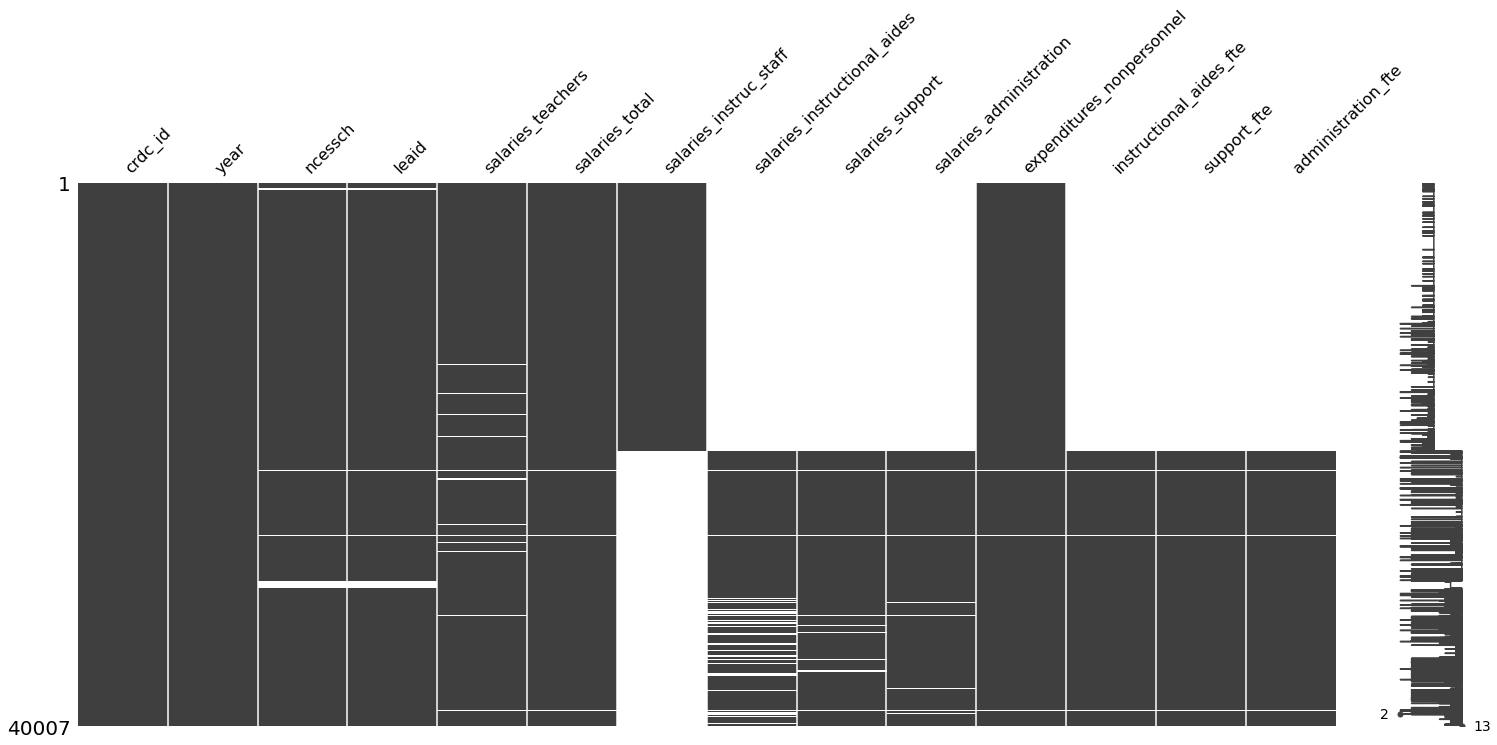

In [89]:
msno.matrix(finance)

In [90]:
ap_dir_finance = pd.merge(ap_dir_staff, finance, how = "left", on=["ncessch", "year"])
ap_dir_finance

,ncessch,year,leaid_x,race,sex,students_AP_exam_none,students_AP_exam_oneormore,latitude,longitude,enrollment,...,salaries_teachers,salaries_total,salaries_instruc_staff,salaries_instructional_aides,salaries_support,salaries_administration,expenditures_nonpersonnel,instructional_aides_fte,support_fte,administration_fte
0,60000103278.00000,2011,600001.00000,99,99,89.00000,42.00000,34.49362,-118.21611,513.00000,...,1552253.00000,1552253.00000,749092.00000,NaN,NaN,NaN,488255.00000,NaN,NaN,NaN
1,60000310347.00000,2011,600003.00000,99,99,13.00000,2.00000,37.55963,-121.96304,420.00000,...,7212384.00000,12976292.00000,9660030.00000,NaN,NaN,NaN,211013.00000,NaN,NaN,NaN
2,60001302405.00000,2011,600013.00000,99,99,11.00000,483.00000,38.81363,-121.25347,1843.00000,...,4454202.00000,6077220.00000,4584422.00000,NaN,NaN,NaN,0.00000,NaN,NaN,NaN
3,60001311010.00000,2011,600013.00000,99,99,0.00000,424.00000,38.83641,-121.28939,1777.00000,...,3938642.00000,5442982.00000,4064656.00000,NaN,NaN,NaN,0.00000,NaN,NaN,NaN
4,60001609086.00000,2011,600016.00000,99,99,319.00000,439.00000,34.10469,-117.65745,3557.00000,...,9276692.00000,11977703.00000,9692617.00000,NaN,NaN,NaN,463116.00000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4545,69103512016.00000,2017,691035.00000,99,99,29.00000,227.00000,37.29104,-121.87394,656.00000,...,3480013.00000,4615341.50000,NaN,55190.14100,603708.00000,476429.68800,663965.00000,0.44000,7.63000,4.00000
4546,69103512016.00000,2017,691035.00000,99,99,29.00000,227.00000,37.29104,-121.87394,656.00000,...,2418182.00000,3918062.00000,NaN,NaN,160737.73400,387642.00000,732739.00000,0.00000,3.80000,4.00000
4547,69103512016.00000,2017,691035.00000,99,99,29.00000,227.00000,37.29104,-121.87394,656.00000,...,3480013.00000,4615341.50000,NaN,55190.14100,603708.00000,476429.68800,663965.00000,0.44000,7.63000,4.00000
4548,69103512016.00000,2017,691035.00000,99,99,29.00000,227.00000,37.29104,-121.87394,656.00000,...,2418182.00000,3918062.00000,NaN,NaN,160737.73400,387642.00000,732739.00000,0.00000,3.80000,4.00000


<AxesSubplot:>

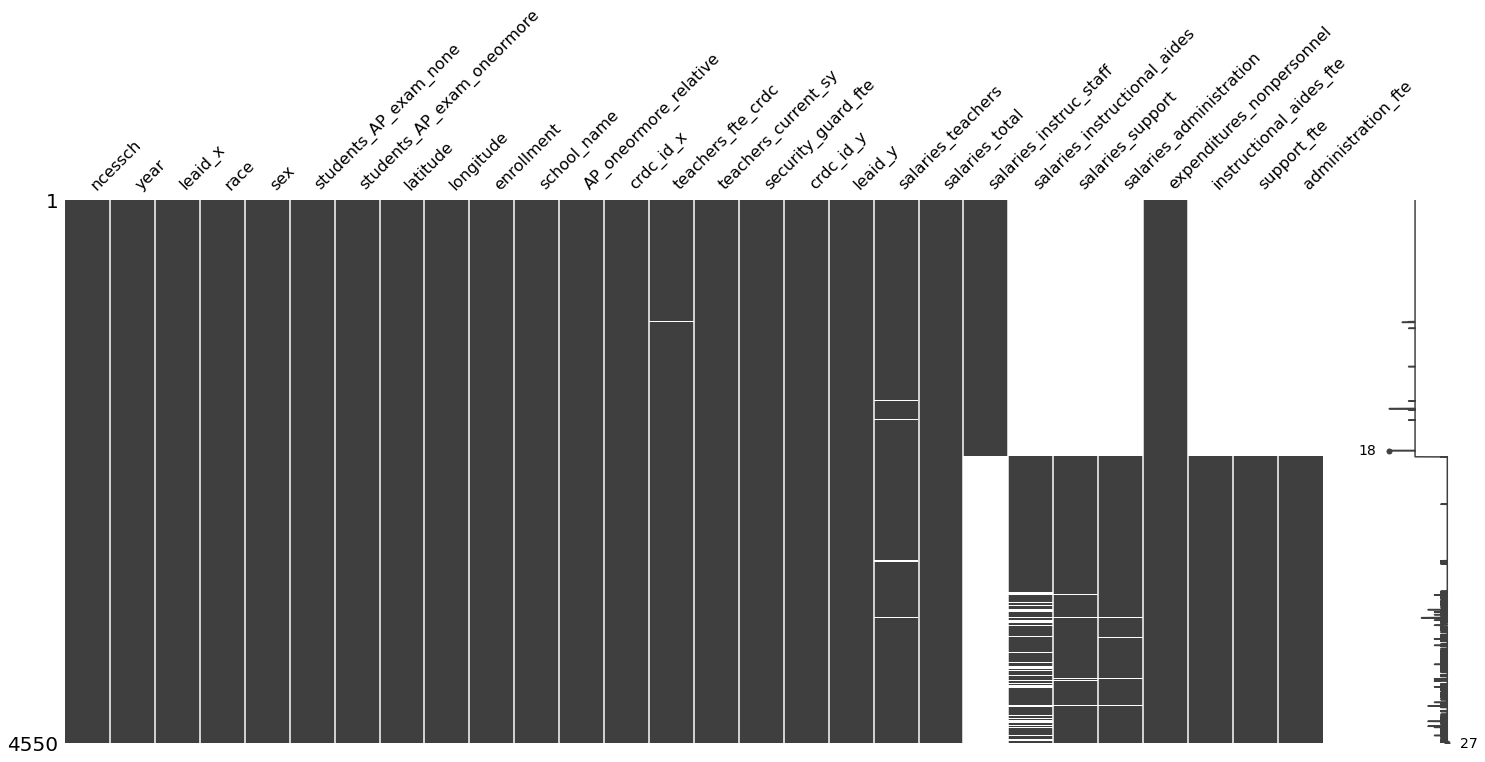

In [91]:
#now making total finance matrix !! 
msno.matrix(ap_dir_finance)
#once you fix up the finance matrix than merge them all together 

In [92]:
ap_dir_finance = ap_dir_finance.dropna(axis = 0, subset=('salaries_teachers',))
ap_dir_finance = ap_dir_finance.dropna(axis = 0, subset=('teachers_fte_crdc',))


ap_dir_finance.isnull().sum()

ncessch                            0
year                               0
leaid_x                            0
race                               0
sex                                0
students_AP_exam_none              0
students_AP_exam_oneormore         0
latitude                           0
longitude                          0
enrollment                         0
school_name                        0
AP_oneormore_relative              0
crdc_id_x                          0
teachers_fte_crdc                  0
teachers_current_sy                0
security_guard_fte                 0
crdc_id_y                          0
leaid_y                            0
salaries_teachers                  0
salaries_total                     0
salaries_instruc_staff          2375
salaries_instructional_aides    2464
salaries_support                2154
salaries_administration         2142
expenditures_nonpersonnel          0
instructional_aides_fte         2129
support_fte                     2129
a

In [93]:
ap_dir_finance.reset_index()

,index,ncessch,year,leaid_x,race,sex,students_AP_exam_none,students_AP_exam_oneormore,latitude,longitude,...,salaries_teachers,salaries_total,salaries_instruc_staff,salaries_instructional_aides,salaries_support,salaries_administration,expenditures_nonpersonnel,instructional_aides_fte,support_fte,administration_fte
0,0,60000103278.00000,2011,600001.00000,99,99,89.00000,42.00000,34.49362,-118.21611,...,1552253.00000,1552253.00000,749092.00000,NaN,NaN,NaN,488255.00000,NaN,NaN,NaN
1,1,60000310347.00000,2011,600003.00000,99,99,13.00000,2.00000,37.55963,-121.96304,...,7212384.00000,12976292.00000,9660030.00000,NaN,NaN,NaN,211013.00000,NaN,NaN,NaN
2,2,60001302405.00000,2011,600013.00000,99,99,11.00000,483.00000,38.81363,-121.25347,...,4454202.00000,6077220.00000,4584422.00000,NaN,NaN,NaN,0.00000,NaN,NaN,NaN
3,3,60001311010.00000,2011,600013.00000,99,99,0.00000,424.00000,38.83641,-121.28939,...,3938642.00000,5442982.00000,4064656.00000,NaN,NaN,NaN,0.00000,NaN,NaN,NaN
4,4,60001609086.00000,2011,600016.00000,99,99,319.00000,439.00000,34.10469,-117.65745,...,9276692.00000,11977703.00000,9692617.00000,NaN,NaN,NaN,463116.00000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4499,4545,69103512016.00000,2017,691035.00000,99,99,29.00000,227.00000,37.29104,-121.87394,...,3480013.00000,4615341.50000,NaN,55190.14100,603708.00000,476429.68800,663965.00000,0.44000,7.63000,4.00000
4500,4546,69103512016.00000,2017,691035.00000,99,99,29.00000,227.00000,37.29104,-121.87394,...,2418182.00000,3918062.00000,NaN,NaN,160737.73400,387642.00000,732739.00000,0.00000,3.80000,4.00000
4501,4547,69103512016.00000,2017,691035.00000,99,99,29.00000,227.00000,37.29104,-121.87394,...,3480013.00000,4615341.50000,NaN,55190.14100,603708.00000,476429.68800,663965.00000,0.44000,7.63000,4.00000
4502,4548,69103512016.00000,2017,691035.00000,99,99,29.00000,227.00000,37.29104,-121.87394,...,2418182.00000,3918062.00000,NaN,NaN,160737.73400,387642.00000,732739.00000,0.00000,3.80000,4.00000


In [94]:
#divide the salaries by the total teacher

divide = ['salaries_teachers']

ap_dir_finance[divide] = ap_dir_finance[divide].div(ap_dir_finance['teachers_fte_crdc'].values, axis =0)


ap_dir_finance

,ncessch,year,leaid_x,race,sex,students_AP_exam_none,students_AP_exam_oneormore,latitude,longitude,enrollment,...,salaries_teachers,salaries_total,salaries_instruc_staff,salaries_instructional_aides,salaries_support,salaries_administration,expenditures_nonpersonnel,instructional_aides_fte,support_fte,administration_fte
0,60000103278.00000,2011,600001.00000,99,99,89.00000,42.00000,34.49362,-118.21611,513.00000,...,77612.65000,1552253.00000,749092.00000,NaN,NaN,NaN,488255.00000,NaN,NaN,NaN
1,60000310347.00000,2011,600003.00000,99,99,13.00000,2.00000,37.55963,-121.96304,420.00000,...,84851.57647,12976292.00000,9660030.00000,NaN,NaN,NaN,211013.00000,NaN,NaN,NaN
2,60001302405.00000,2011,600013.00000,99,99,11.00000,483.00000,38.81363,-121.25347,1843.00000,...,51197.72414,6077220.00000,4584422.00000,NaN,NaN,NaN,0.00000,NaN,NaN,NaN
3,60001311010.00000,2011,600013.00000,99,99,0.00000,424.00000,38.83641,-121.28939,1777.00000,...,54703.36111,5442982.00000,4064656.00000,NaN,NaN,NaN,0.00000,NaN,NaN,NaN
4,60001609086.00000,2011,600016.00000,99,99,319.00000,439.00000,34.10469,-117.65745,3557.00000,...,75420.26016,11977703.00000,9692617.00000,NaN,NaN,NaN,463116.00000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4545,69103512016.00000,2017,691035.00000,99,99,29.00000,227.00000,37.29104,-121.87394,656.00000,...,79091.20455,4615341.50000,NaN,55190.14100,603708.00000,476429.68800,663965.00000,0.44000,7.63000,4.00000
4546,69103512016.00000,2017,691035.00000,99,99,29.00000,227.00000,37.29104,-121.87394,656.00000,...,54958.68182,3918062.00000,NaN,NaN,160737.73400,387642.00000,732739.00000,0.00000,3.80000,4.00000
4547,69103512016.00000,2017,691035.00000,99,99,29.00000,227.00000,37.29104,-121.87394,656.00000,...,105454.93939,4615341.50000,NaN,55190.14100,603708.00000,476429.68800,663965.00000,0.44000,7.63000,4.00000
4548,69103512016.00000,2017,691035.00000,99,99,29.00000,227.00000,37.29104,-121.87394,656.00000,...,73278.24242,3918062.00000,NaN,NaN,160737.73400,387642.00000,732739.00000,0.00000,3.80000,4.00000


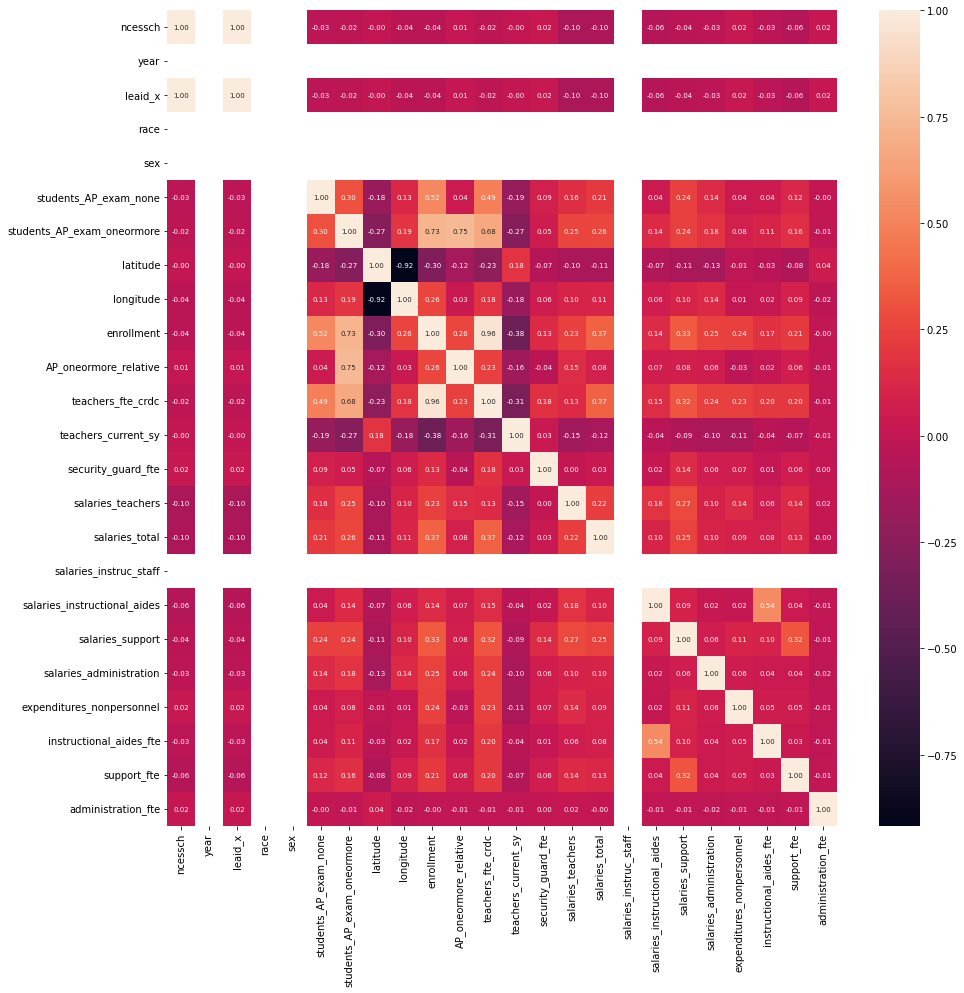

In [95]:
#only do the correlation matrix for the year 2015 .... to see for most variables 
fig, ax = plt.subplots(figsize=(15,15))
correlation = ap_dir_finance[ap_dir_finance['year'] == 2015].corr()
sns.heatmap(correlation, annot = True, ax = ax,
           annot_kws={"fontsize":7}, fmt ='.2f')
plt.show()

## YAY salries teachers actuallt great !! 

In [96]:
ap_dir_finance.columns

Index(['ncessch', 'year', 'leaid_x', 'race', 'sex', 'students_AP_exam_none',
       'students_AP_exam_oneormore', 'latitude', 'longitude', 'enrollment',
       'school_name', 'AP_oneormore_relative', 'crdc_id_x',
       'teachers_fte_crdc', 'teachers_current_sy', 'security_guard_fte',
       'crdc_id_y', 'leaid_y', 'salaries_teachers', 'salaries_total',
       'salaries_instruc_staff', 'salaries_instructional_aides',
       'salaries_support', 'salaries_administration',
       'expenditures_nonpersonnel', 'instructional_aides_fte', 'support_fte',
       'administration_fte'],
      dtype='object')

In [98]:
# final dataframe 
ap_dir_finance = ap_dir_finance.drop(['crdc_id_y', 'leaid_y',
                                       'salaries_total',
       'salaries_instruc_staff', 'salaries_instructional_aides',
       'salaries_support', 'salaries_administration',
       'expenditures_nonpersonnel', 'instructional_aides_fte', 'support_fte',
       'administration_fte'], axis =1)

ap_dir_finance_staff = ap_dir_finance
ap_dir_finance_staff


KeyError: "['crdc_id_y' 'leaid_y' 'salaries_total' 'salaries_instruc_staff'\n 'salaries_instructional_aides' 'salaries_support'\n 'salaries_administration' 'expenditures_nonpersonnel'\n 'instructional_aides_fte' 'support_fte' 'administration_fte'] not found in axis"

In [99]:
#ap_dir_finance_staff.to_csv('ap_dir_school.csv')